# Install OpenCV

In [2]:
#!pip install opencv-python

In [2]:
import cv2
print(cv2.__version__)

4.0.0


In [4]:
#!python -m pip install --upgrade pip

# Read, Write, Show Images in OpenCV

In [5]:
img1 = cv2.imread('lena.tif',1)
img2 = cv2.imread('lena.tif',0)
img3 = cv2.imread('lena.tif',-1)

In [6]:
print(img1.shape)
print(img2.shape)
print(img3.shape)

(512, 512, 3)
(512, 512)
(512, 512, 3)


In [7]:
cv2.namedWindow('Picture', cv2.WINDOW_AUTOSIZE)
cv2.imshow('Picture', img3) #Show the image
k = cv2.waitKey(0)
if k==27: # 27 ascii value of ESC
    cv2.destroyWindow('Picture')
#cv2.destroyWindow('Picture')

# Read, Write, Show Videos from Camera in OpenCV

In [11]:
import cv2

cap = cv2.VideoCapture(0) # argument 0 suggest to use camera and for video give
                          # location of video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc,20.0,(640,480))
                     #(name,codec,frame_per_second,size)
while(True):
    ret, frame = cap.read()
    cv2.namedWindow('frame', cv2.WINDOW_AUTOSIZE)
    # gray = cv2.cvtColor(frame,cv2.COLOR_BGR2Gray)
    if ret== True:
        out.write(frame)
        
        
        cv2.imshow('frame',frame)
        k = cv2.waitKey(1)
        if k == 27:
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

In [10]:
import cv2

cap = cv2.VideoCapture('vid.mp4')
print(cap.isOpened()) # isOpened() will return True is file is open otherwise False
while(True):
    ret, frame = cap.read()
    w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    #print(w,h)
    cv2.namedWindow('frame', cv2.WINDOW_AUTOSIZE)
    # gray = cv2.cvtColor(frame,cv2.COLOR_BGR2Gray)
    cv2.imshow('frame',frame)
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release() 
cv2.destroyAllWindows()

True


# Drawing geometric shape on images using OpenCV :

In [1]:
import cv2


img = cv2.imread('lena.tif',1)
                                #(B,G,R)
img = cv2.line(img,(0,0),(500,500),(255,55,60),1)
img = cv2.line(img,(50,0),(500,500),(0,55,60),1)
img = cv2.arrowedLine(img,(50,50),(500,400),(0,55,60),5)

img = cv2.rectangle(img,(45,60),(400,450),(0,0,0),3)
                  #(image,start_cod,End_cod,color,thickness)
    
img = cv2.circle(img,(200,200),50,(0,0,255))
               #(imgage,center,radius,color,thickness)

font = cv2.FONT_HERSHEY_COMPLEX
img = cv2.putText(img,'My opencv',(0,100),font,1,(0,0,255),1,cv2.LINE_AA)
                #(image,string,start,font,font_size,color_of_font,thickess,line_types)

cv2.namedWindow('Picture', cv2.WINDOW_AUTOSIZE)
cv2.imshow('Picture', img) #Show the image
k = cv2.waitKey(0)
if k==27: # 27 ascii value of ESC
    cv2.destroyWindow('Picture')

# Setting camera parameters in OpenCV

In [29]:
import cv2
cap = cv2.VideoCapture(0)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH),cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# width =3 and height = 4
cap.set(3,1200)
cap.set(4,720)
print(cap.get(3),cap.get(4))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame',255-frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release() 
cv2.destroyAllWindows()

640.0 480.0
1280.0 720.0


# Show Date and Time on Videos using OpenCV

In [1]:
import cv2
import datetime

cap = cv2.VideoCapture(0)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH),cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# width =3 and height = 4
cap.set(3,1200)
cap.set(4,720)
print(cap.get(3),cap.get(4))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        #frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        font = cv2.FONT_HERSHEY_COMPLEX
        datet = str(datetime.datetime.now())
        #text = 'width:'+str(cap.get(3))+'Height:'+str(cap.get(4))
        cv2.putText(frame,datet,(0,30),font,1,(0,255,0),1,cv2.LINE_AA)
        
        cv2.imshow('frame',255-frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release() 
cv2.destroyAllWindows()

640.0 480.0
1280.0 720.0


# Handle Mouse events in OpenCV

In [2]:
import cv2

events = [i for i in dir(cv2) if 'EVENT' in i]
print(events,len(events))

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP'] 18


In [2]:
import cv2
import numpy as np

def click_event(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,' ',y)
        font = cv2.FONT_HERSHEY_SIMPLEX
        strxy = str(x)+' , '+str(y)
        cv2.putText(img,strxy,(x,y),font,0.5,(0,255,0),1,cv2.LINE_AA)
        cv2.imshow('image',img)
    if event == cv2.EVENT_RBUTTONDOWN:
        blue = img[y,x,0]
        green = img[y,x,1]
        red = img[y,x,2]
        font = cv2.FONT_HERSHEY_SIMPLEX
        strbgr = str(blue)+','+str(green)+','+str(red)
        cv2.putText(img,strbgr,(x,y),font,0.5,(0,255,250),1,cv2.LINE_AA)
        cv2.imshow('image',img)
        
        
#img = np.zeros((512,512,3),np.uint8)
img = cv2.imread('lena.tif',1)
cv2.imshow('image',img)

cv2.setMouseCallback('image',click_event)
                    #(name_of_image(window name) , callback_function)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

51   250
205   286
268   274
276   251
301   261


In [1]:
# print line between two points which is clicked using mouse
import cv2
import numpy as np

def click_event(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        #print(x,' ',y)
        cv2.circle(img,(x,y),1,(0,255,255))
        points.append((x,y))
        if len(points)>=2:
            cv2.line(img,points[-1],points[-2],(255,0,0),2)
            #cv2.rectangle(img,points[-1],points[-2],(255,0,0),2)
            
        cv2.imshow('image',img)

        
        
#img = np.zeros((512,512,3),np.uint8)
img = cv2.imread('lena.tif',1)
cv2.imshow('image',img)
points = []

cv2.setMouseCallback('image',click_event)
                    #(name_of_image(window name) , callback_function)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# print color of touched point which is clicked using mouse
import cv2
import numpy as np

def click_event(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        blue = img[y,x,0]
        green = img[y,x,1]
        red = img[y,x,2]
        cv2.circle(img,(x,y),3,(0,0,255),-1)
        
        mycolorImage = np.zeros((512,512,3),np.uint8)
        mycolorImage[:] = [blue,green,red]
        cv2.imshow('color',mycolorImage)
        
        
#img = np.zeros((512,512,3),np.uint8)
img = cv2.imread('lena.tif',1)
cv2.imshow('image',img)
points = []

cv2.setMouseCallback('image',click_event)
                    #(name_of_image(window name) , callback_function)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
import cv2

img = cv2.imread('lena.tif',1)

print(img.shape) # returns a tuple of number of rows, columns and channels
print(img.size)  # returns total number of pixels is accessed
print(img.dtype) # returns image datatype is obtained  
b,g,r = cv2.split(img)

cv2.imshow('image',b)
cv2.imshow('image1',g)
cv2.imshow('image2',r)

cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512, 3)
786432
uint8


# Bitwise Operations :

In [14]:
import cv2
import numpy as np


img1 = np.zeros((250,500,3),np.uint8)
img1 = cv2.rectangle(img1,(200,0),(300,100),(255,255,255),-1)

img2 = np.zeros((250,500,3),np.uint8)
img2 = cv2.rectangle(img2,(250,0),(500,250),(255,255,255),-1)

bit_and = cv2.bitwise_and(img1,img2)
cv2.imshow("BitAnd",bit_and)

bit_or = cv2.bitwise_or(img1,img2)
cv2.imshow("BitOr",bit_or)

bit_xor = cv2.bitwise_xor(img1,img2)
cv2.imshow("BitXor",bit_xor)

cv2.imshow("img1",img1)
cv2.imshow("img2",img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Bind trackbar to OpenCV Windows:

trackbar used as handy when we want to change value of pixel dynamically.

In [2]:
import numpy as np
import cv2

img = np.zeros((300,512,3),np.uint8)
cv2.namedWindow('image')

def nothing(x):
    pass

                 #(trackbar,windowNmae,intial value,final value,call_back_function_name)
cv2.createTrackbar('B','image',0,255,nothing)# will change value of B value in image
                            #[intial_value,final_value] range u want 
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('R','image',0,255,nothing)

switch = '0 : OFF\n 1: ON'
cv2.createTrackbar(switch,'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    
    b = cv2.getTrackbarPos('B','image')
    g = cv2.getTrackbarPos('G','image')
    r = cv2.getTrackbarPos('R','image')
    s = cv2.getTrackbarPos(switch,'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
    
cv2.destroyAllWindows()        

# Object Detection and Object Tracking using HSV Color Space :

In [1]:
import cv2
import numpy as np

def nothing(x):
    pass

cap = cv2.VideoCapture(0)

cv2.namedWindow("Tracking")

cv2.createTrackbar("LH","Tracking",0,255,nothing)
cv2.createTrackbar("LS","Tracking",0,255,nothing)
cv2.createTrackbar("LV","Tracking",0,255,nothing)

cv2.createTrackbar("UH","Tracking",255,255,nothing)
cv2.createTrackbar("US","Tracking",255,255,nothing)
cv2.createTrackbar("UV","Tracking",255,255,nothing)

while True:
    #frame = cv2.imread('ball.jpg') # for image
    _,frame = cap.read()#for camera
    
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    lh = cv2.getTrackbarPos("LH","Tracking")
    ls = cv2.getTrackbarPos("LS","Tracking")
    lv = cv2.getTrackbarPos("LV","Tracking")
    
    uh = cv2.getTrackbarPos("UH","Tracking")
    us = cv2.getTrackbarPos("US","Tracking")
    uv = cv2.getTrackbarPos("UV","Tracking")
    
    l_b = np.array([lh,ls,lv])
    u_b = np.array([uh,us,uv])
    
    mask = cv2.inRange(hsv, l_b, u_b)
    res = cv2.bitwise_and(frame,frame,mask = mask)
    
    #cv2.imshow("frame",frame)
    #cv2.imshow("mask",mask)
    cv2.imshow("Res",res)
    
    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()        
cv2.destroyAllWindows()        

# Image Thresholding :

In [7]:
import cv2
import numpy as np

img = cv2.imread("lena.tif",0)

_, th1 = cv2.threshold(img,150,255,cv2.THRESH_TRUNC)

cv2.imshow("Image",img)
cv2.imshow("th1",th1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Adaptive Thresholding :

In [14]:
import cv2
import numpy as np

img = cv2.imread("lena.tif",0)

_, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

cv2.imshow("Image",img)
cv2.imshow("th1",th1)
cv2.imshow("th2",th2)
cv2.imshow("th3",th3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# MatplotLib with OpenCV :

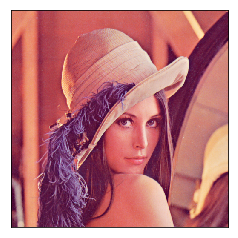

In [22]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("lena.tif",1)
#cv2.imshow('image',img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([]),plt.yticks([])# hide x and y values in output
plt.show()


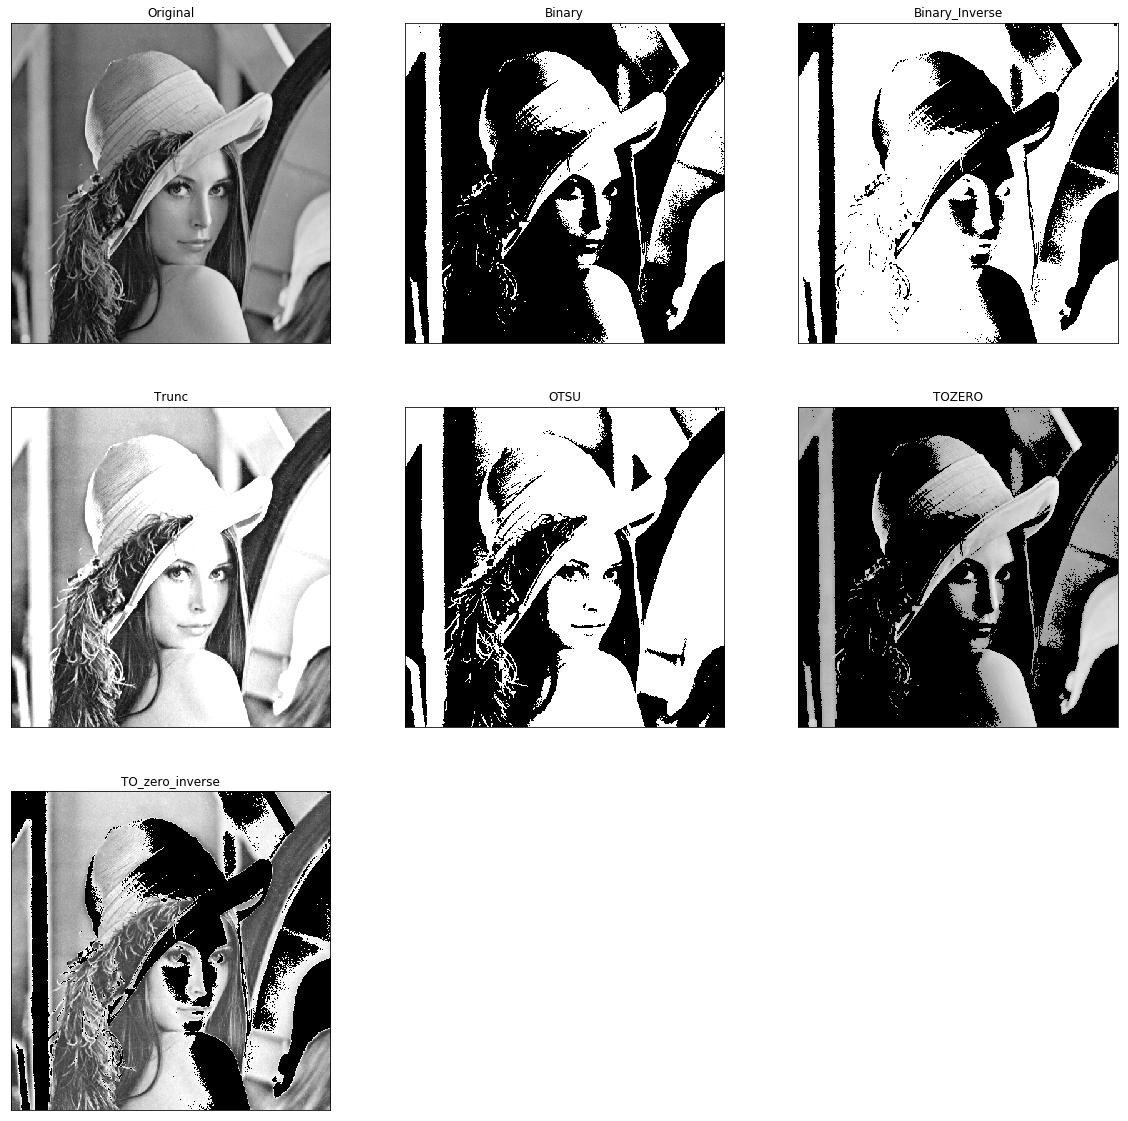

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("lena.tif",0)

_, th1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img,150,255,cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img,150,255,cv2.THRESH_OTSU)
_, th5 = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
_, th6 = cv2.threshold(img,150,255,cv2.THRESH_TOZERO_INV)

titles = ["Original","Binary","Binary_Inverse","Trunc","OTSU","TOZERO","TO_zero_inverse"]
images = [img,th1,th2,th3,th4,th5,th6]

plt.figure(figsize=(20,20))
for i in range(7):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()    

# Morphological Transformation :

Morphological transformation are some simple operations based on the images shape, normally performed on binary images.

A kernel tells you how to change the value of any given pixel by combining it with different amounts of the neighbouring pixels.

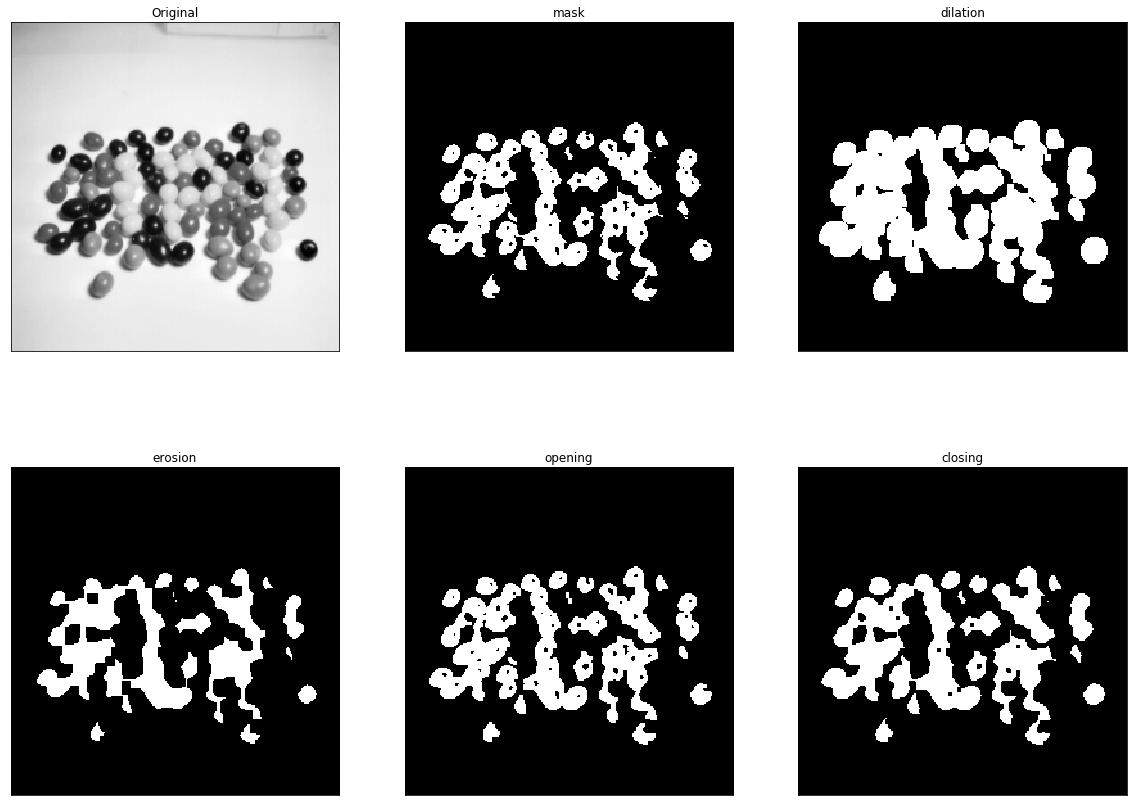

In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("4.1.08.tiff",cv2.IMREAD_GRAYSCALE)
_,mask = cv2.threshold(img,120,255,cv2.THRESH_BINARY_INV)

kernal = np.ones((3,3),np.uint8)
dilation = cv2.dilate(mask,kernal,iterations=2)
                    #(image,kernel,iteration)
erosion = cv2.erode(dilation,kernal,iterations=3)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN,kernal) # erosion followed by dilation
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE,kernal) # dilation followed by erosion

titles = ["Original","mask","dilation","erosion","opening","closing"]
images = [img,mask,dilation,erosion,opening,closing]

plt.figure(figsize=(20,15))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()    

# Smoothing/Blurring Images using OpenCV :

Homogeneous filter is the most simple filter, each output pixel is the mean of its kernel neighbors.

As in one-dimensional signals, images also can be filtered with various low-pass filters(LPF), high-pass filters(HPF) etc.

-> LPF helps in removing noises, blurring the images.

-> HPF filters helps in finding edges in the images.

Gaussian filter is nothing but using different-weight-kernel, in both x and y direction.

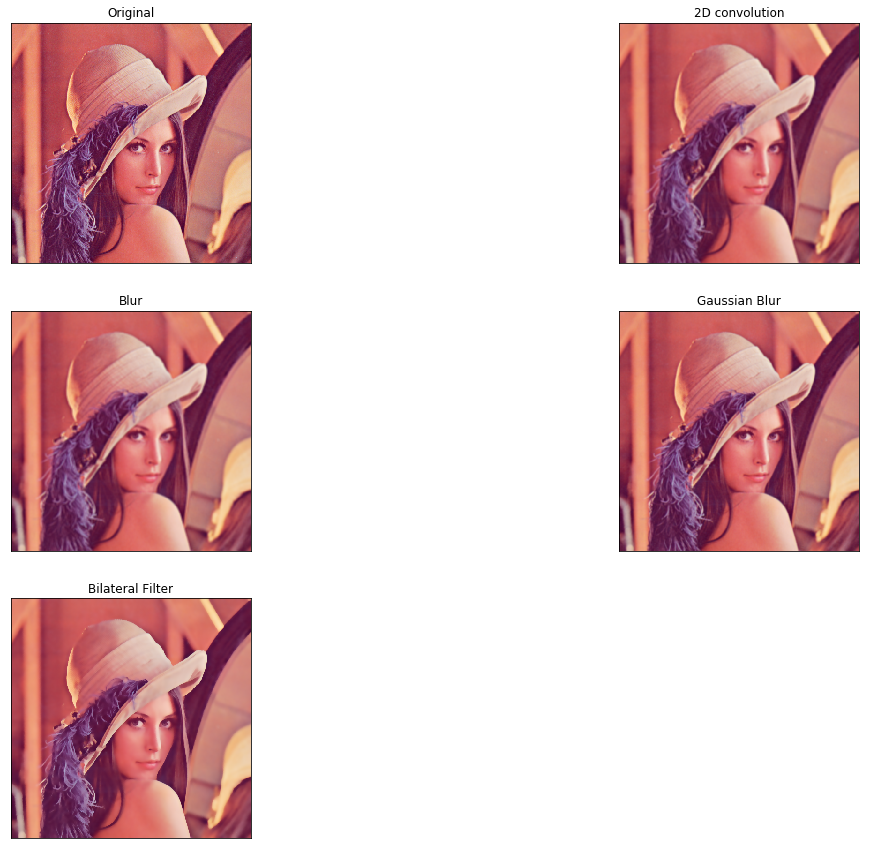

In [78]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("lena.tif")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.float32)/25

dst = cv2.filter2D(img,-1,kernel)
blur = cv2.blur(img,(5,5))
gblur = cv2.GaussianBlur(img,(5,5),0)
bilateralfilter = cv2.bilateralFilter(img,9,75,75)

titles = ["Original","2D convolution","Blur","Gaussian Blur","Bilateral Filter"]
images = [img,dst,blur,gblur,bilateralfilter]

plt.figure(figsize=(20,15))
for i in range(len(images)):
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()    

# Image Gradients and Edge Detection :

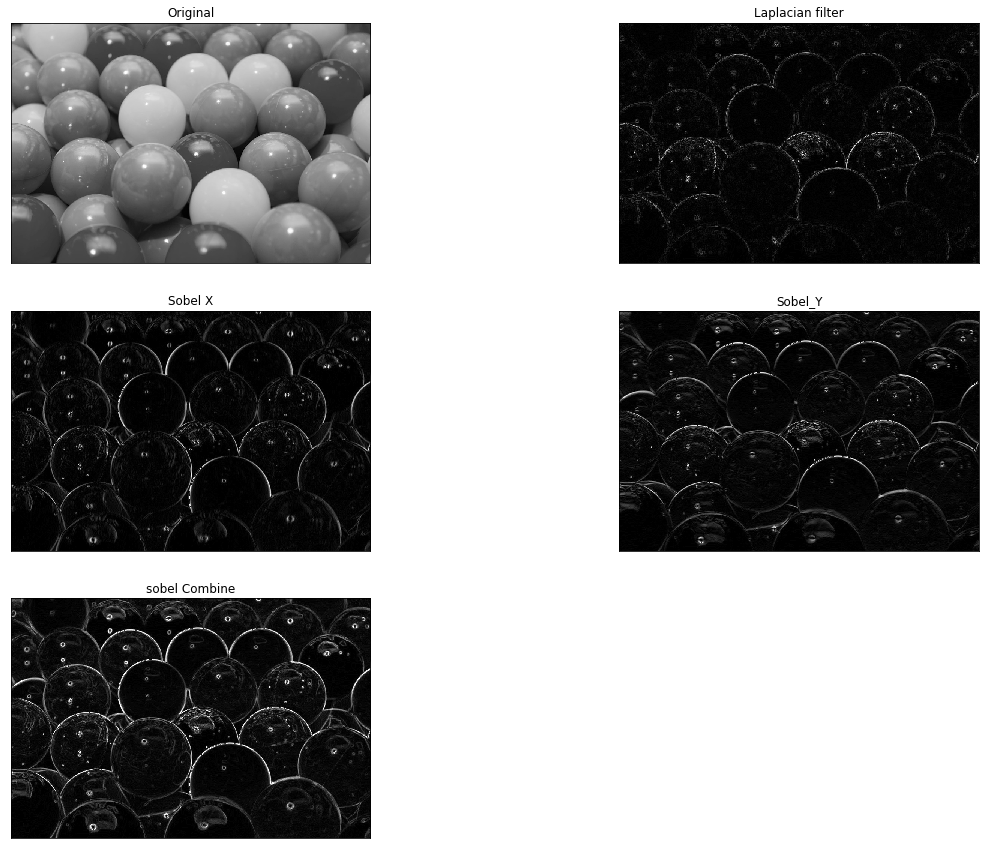

In [93]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("ball.jpg",cv2.IMREAD_GRAYSCALE)

lap = cv2.Laplacian(img,cv2.CV_64F,ksize=3)
                   #(image,data_type)
lap = np.uint8(np.absolute(lap))    

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0)
                  #(images,data type,x-direction-flag,y-direction-flag)
sobelx = np.uint8(np.absolute(sobelx))

sobely = cv2.Sobel(img,cv2.CV_64F,0,1)
                  #(images,data type,x-direction-flag,y-direction-flag)
sobely = np.uint8(np.absolute(sobely))

sobelcom = cv2.bitwise_or(sobelx,sobely)

titles = ["Original","Laplacian filter","Sobel X", "Sobel_Y","sobel Combine"]

images = [img,lap,sobelx,sobely,sobelcom]

plt.figure(figsize=(20,15))
for i in range(len(images)):
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()    

# Canny Edge Detection in OpenCV:

The canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986.

The Canny edge detection algorithm is composed of 5 steps:

1. Noise Reduction
2. Gradient calculation
3. Non-maximum suppression
4. Double threshold
5. Edge tracking by Hystersis

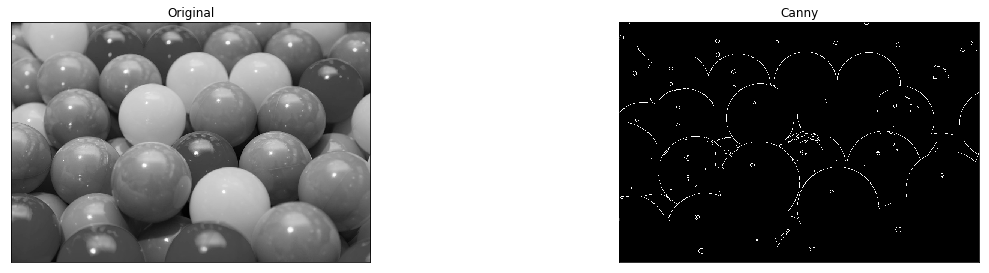

In [94]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("ball.jpg",0)

canny = cv2.Canny(img,100,200,)

titles = ["Original","Canny"]

images = [img,canny]

plt.figure(figsize=(20,15))
for i in range(len(images)):
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()    

# Image pyramids with OpenCV

Pyramid representation is a type of multi-signal representation in which a signal or an image is subject to repeated smoothing and subsampling

Gaussian pyramid is nothing but repeat filtering and subsampling of image.

In [5]:
import cv2
import numpy as np
img = cv2.imread("lena.tif")

lr1 = cv2.pyrDown(img)
lr2 = cv2.pyrDown(lr1)

up1 = cv2.pyrUp(lr2)

cv2.imshow("Original Image",img)
cv2.imshow("Pydown Image",lr1)
cv2.imshow("pyrdown Image 2",lr2)
cv2.imshow("Pyrup Image",up1)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
import cv2
import numpy as np
img = cv2.imread("lena.tif")

layer = img.copy()
gp = [layer]

for i in range(6):
    layer = cv2.pyrDown(layer)
    gp.append(layer)
    cv2.imshow(str(i),layer)

cv2.imshow("Original Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Laplacian Pyramid : A level in Laplacian Pyramid is formed byy the difference between that level in Gaussian Pyramid and expanded version of its upper level in Gaussian Pyramid.

Laplacian and Gaussian help to bend the images and reconstruct the images.

In [9]:
import cv2
import numpy as np
img = cv2.imread("lena.tif")

layer = img.copy()
gp = [layer]

for i in range(6):
    layer = cv2.pyrDown(layer)
    gp.append(layer)
    
layer = gp[5]
cv2.imshow('upper level Gaussina pyramid',layer)
lp = [layer]

for i in range(5,0,-1):
    guassian_extended = cv2.pyrUp(gp[i])
    laplacian = cv2.subtract(gp[i-1],guassian_extended)
    cv2.imshow(str(i),laplacian)
    
cv2.imshow("Original Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Creating a stand alone executable from a python script

In [11]:
#!pip install pyinstaller

# Image Blending :

1. Load the two images of apple and orange

2. Find the guassian pyramid for apple and orange

3. From Gaussian pyramids, find their laplacian pyramids

4. Now join the left half of apple and right halp of orange in each levels of laplacian pyramids

5. Finally from this joint image pyramids, reconstruct the original images.

In [23]:
import cv2
import numpy as np

apple = cv2.imread("apple.jpg")
orange = cv2.imread("orange.jpg")
apple = cv2.resize(apple,dsize=(512,512))

print(apple.shape)
print(orange.shape)

ao = np.hstack((apple[:,:256],orange[:,256:]))

#generate Gaussian pyramid
apple_c = apple.copy()
gp_apple = [apple_c]

for i in range(6):
    apple_c = cv2.pyrDown(apple_c)
    gp_apple.append(apple_c)

#generate Gaussian pyramid
org_c = orange.copy()
gp_org = [org_c]

for i in range(6):
    org_c = cv2.pyrDown(org_c)
    gp_org.append(org_c)

# Generate Laplacian pyramid for  Apple
apple_c = gp_apple[5]
lp_apple = [apple_c]
for i in range(5,0,-1):
    guassian_ex = cv2.pyrUp(gp_apple[i])
    laplacian = cv2.subtract(gp_apple[i-1],guassian_ex)
    lp_apple.append(laplacian)

# Generate Laplacian pyramid for orange
org_c = gp_org[5]
lp_org = [org_c]
for i in range(5,0,-1):
    guassian_ex = cv2.pyrUp(gp_org[i])
    laplacian = cv2.subtract(gp_org[i-1],guassian_ex)
    lp_org.append(laplacian)

#Now add left and right halves of images in each level
apple_org = []
n=0
for apple_lap,org_lap in zip(lp_apple,lp_org):
    n+=1
    cols, rows, ch = apple_lap.shape
    laplacian = np.hstack((apple_lap[:,0:int(cols/2)],org_lap[:,int(cols/2):]))
    apple_org.append(laplacian)

# Now construct
apple_org_re = apple_org[0]
for i in range(1,6):
    apple_org_re = cv2.pyrUp(apple_org_re)
    apple_org_re = cv2.add(apple_org[i],apple_org_re)
    
cv2.imshow("Apple Orange Merge",ao)
cv2.imshow("Apple Orange Merge 2",apple_org_re)
cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512, 3)
(512, 512, 3)


# Find and Draw Contour with OpenCV :

In [1]:
import numpy as np
import cv2

img = cv2.imread('logo.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray,127,255,0)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print("Number of Contour = "+str(len(contours)))

cv2.drawContours(img,contours,5,(123,255,124),3)
                #(image,contour_list,contour_index,color,width)
                #contour -1 mean print all contour
cv2.imshow('Image',img)
cv2.imshow('Image_gray',imgray)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contour = 12


# Motion Detection and Tracking using OpenCV Contours :

In [25]:
import cv2
import numpy as np

#cap = cv2.VideoCapture("opencv_data/vtest.avi")
cap = cv2.VideoCapture(0)

ret, frame1 = cap.read()
ret, frame2= cap.read()

while cap.isOpened():
    
    diff = cv2.absdiff(frame1,frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    _,thresh = cv2.threshold(blur,20,255,cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh,None,iterations=3)
    contours,_ = cv2.findContours(dilated,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    #cv2.drawContours(frame1,contours,-1,(0,255,0),2)
    
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        if cv2.contourArea(contour) < 700 :
            continue
        cv2.rectangle(frame1,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(frame1,"Status:{}".format('Movement'),(10,20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)    
    
    cv2.imshow("feed",frame1)
    frame1 = frame2
    ret, frame2 = cap.read() # ret become false at end of video
    if ret == False:
        break
    if cv2.waitKey(40) == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

# Detect Simple Geometric shapes Using OpenCV :

In [22]:
import numpy as np
import cv2

img = cv2.imread('opencv_data/pic5.png')
imgGrey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(imgGrey,200,255,cv2.THRESH_BINARY)
contours,_ = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contor in contour:
    approx = cv2.approxPolyDP(contor,0.01*cv2.arcLength(contor,True),True)
    cv2.drawContours(img,[approx],0,(0,0,0),5)
    x,y = approx.ravel()[0],approx.ravel()[1]
    if len(approx) == 3:
        cv2.putText(img,"Triangle",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0))
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(approx)
        aspectratio = float(w)/h
        print(aspectratio)
        if aspectratio >=0.95 and aspectratio <= 1.05:
            cv2.putText(img,"Square",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0))
        else:
            cv2.putText(img,"Rectangle",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0))
    elif len(approx) == 5:
        cv2.putText(img,"Pentagon",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0))
    elif len(approx) == 6:
        cv2.putText(img,"Star",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0))    
    else:
        cv2.putText(img,"Circle",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0))    
     

    
cv2.imshow("shapes",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Histograms using OpenCV :

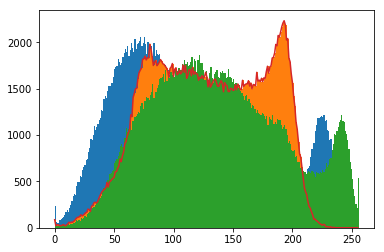

In [28]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread("opencv_data/baboon.jpg")
#img = np.zeros((200,200), np.uint8)
#cv.rectangle(img, (0, 100), (200, 200), (255), -1)
#cv.rectangle(img, (0, 50), (100, 100), (127), -1)
b, g, r = cv.split(img)
cv.imshow("img", img)
#cv.imshow("b", b)
#cv.imshow("g", g)
#cv.imshow("r", r)
         #b.ravel() ->  
plt.hist(b.ravel(), 256, [0, 256])
plt.hist(g.ravel(), 256, [0, 256])
plt.hist(r.ravel(), 256, [0, 256])

hist = cv.calcHist([img], [1], None, [256], [0, 256]) #highlight with different color
                 #(source_image,channel,mask,hist_size,range)
plt.plot(hist)
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

# Template matching using OpenCV :

In [34]:
import cv2
import numpy as np
img = cv2.imread("opencv_data/messi5.jpg")
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread("opencv_data/messi_face.jpg", 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(grey_img, template, cv2.TM_CCORR_NORMED )
print(res)
threshold = 0.99;
loc = np.where(res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.70464975 0.7031919  0.70214367 ... 0.7813448  0.780916   0.78046554]
 [0.7047439  0.7034014  0.7025203  ... 0.7795784  0.7790558  0.7785091 ]
 [0.70434064 0.70310086 0.7025215  ... 0.77819127 0.77754533 0.7769436 ]
 ...
 [0.8444962  0.84462035 0.84451854 ... 0.8084247  0.8084215  0.8084895 ]
 [0.8467333  0.8468984  0.84664416 ... 0.81024104 0.8101824  0.8101334 ]
 [0.8486981  0.84884614 0.848727   ... 0.8116372  0.8116805  0.81125176]]
(array([62], dtype=int64), array([190], dtype=int64))


# Hough Line Transform Theory using OpenCV :

The Hough transform is a popular technique to detect any shape, if you can represent that shape in a mathematical form. It can detecct the shape even if it is broken or distorted a little bit.

. A Line in the image space can be expressed with two variables. 

. . In the cartesian co-ordinate system : y(i) = mx(i)+c 

In [14]:
import cv2
import numpy as np

img = cv2.imread('opencv_data/sudoku.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
cv2.imshow('edges', edges)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 130)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


cv2.imshow('Hough Line Transform', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

Probabilistic Hough Transform opencv python 

In [3]:
import cv2
import numpy as np
img = cv2.imread('opencv_data/sudoku.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imshow('edges', edges)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imshow('image', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

# Circle Detection with OpenCV :

In [6]:
import cv2
import numpy as np

img = cv2.imread('opencv_data/smarties.png')

output = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,5)

circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT, 1, 
                           20, param1=50, param2=30, minRadius=0, maxRadius = 0)

detected_circles = np.uint16(np.around(circles))

for (x,y,r) in detected_circles[0,:]:
    cv2.circle(output,(x,y),r,(0,255,0),3)
    #cv2.circle(output,(x,y),2,(0,255,255),3)
    
cv2.imshow('Hough circle Transform', output)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

# Face Detection using Cascade Classifiers :

In [15]:
import cv2
face_cascade = cv2.CascadeClassifier('opencv_data/haarcascade_frontalface_default.xml')

img = cv2.imread('lena.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.1,4)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
face_cascade = cv2.CascadeClassifier('opencv_data/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
while cap.isOpened():
    _,img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.1,4)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)

    cv2.imshow('img',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()
cap.release()

# Eye Detection using Cascade Classifiers :

In [18]:
# https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml

import cv2
face_cascade = cv2.CascadeClassifier('opencv_data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv_data/haarcascade_eye_tree_eyeglasses.xml')
img = cv2.imread('lena.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.1,4)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),3)
    
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Detect corner with Haris Corner Detector in OpenCV :

Harris Corner Detector :
    1. Determine which window produce very large variations in intensity when moved in both X and Y directions.
    2. With each such window found, a score R is computed
    3. After applying a threshold to this score, important corners are selected & marked.

In [19]:
import numpy as np
import cv2 as cv

img = cv.imread('opencv_data/chessboard.png')

cv.imshow('img', img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

dst = cv.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]

cv.imshow('dst', img)

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

# Detect Corners with Shi Tomasi Corner Detector in OpenCV :

In [1]:
import numpy as np
import cv2 as cv

img = cv.imread('opencv_data/pic1.png')
img = cv.resize(img,dsize=(512,512))

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray, 0, 0.01, 10)

corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv.circle(img, (x, y), 3, [255, 255, 0], -1)

cv.imshow('Shi-Tomasi Corner Detector', img)

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

# Background substration method in OpenCV :

In [16]:
import numpy as np
import cv2

cap = cv2.VideoCapture('opencv_data/vtest.avi')

#fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
#fgbg = cv2.createBackgroundSubtractorMOG2(detectShadows = True)
fgbg = cv2.createBackgroundSubtractorKNN(detectShadows = True)

while True:
    ret,frame = cap.read()
    if ret == False:
        break
    fgmask = fgbg.apply(frame)
    
    cv2.imshow('Frame',frame)
    cv2.imshow('FG MASK Frame',fgmask)
    
    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

cap.release()
cv2.destroyAllWindows()

# Mean Shift Object Tracking :

In [8]:
# print line between two points which is clicked using mouse
import cv2
import numpy as np

def click_event(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        #print(x,' ',y)
        cv2.circle(img,(x,y),1,(0,255,255))
        points.append((x,y))
        if len(points)>=2:
            #cv2.line(img,points[-1],points[-2],(255,0,0),2)
            cv2.rectangle(img,points[-1],points[-2],(255,0,0),2)
            
        cv2.imshow('image',img)

        
        
#img = np.zeros((512,512,3),np.uint8)
cap =cv2.VideoCapture('opencv_data/SlowMotionTraffic.mp4')
#take first frame of video
ret,img = cap.read()
cv2.imshow("image",img)

points = []

cv2.setMouseCallback('image',click_event)
                    #(name_of_image(window name) , callback_function)
print(points)   
cv2.waitKey(0)
cv2.destroyAllWindows()

[]


In [9]:
print(points)

[(533, 172), (619, 245)]


In [16]:
import cv2

cap =cv2.VideoCapture('opencv_data/SlowMotionTraffic.mp4')
#take first frame of video
ret,frame = cap.read()
#cv2.imshow("First",frame)
#Setup initial location of window

x,y,w,h = 533,172,85,70
track_window = (x,y,w,h)
#set up Regon of interest
roi = frame[y:y+h,x:x+w]
hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi,np.array((0.,60.,322.)),np.array((180.,255.,255.,)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,1)

while(1):
    
    ret,frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # Apply meanshift to get new location
        ret,track_window = cv2.meanShift(dst,track_window,term_crit)
        # draw windwo
        x,y,w,h = track_window
        final_image = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
        #cv2.imshow('Back Project',dst)
        cv2.imshow('frame',final_image)
        k =cv2.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()